# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
startup = pd.read_excel('startup-expansion.xlsx')

In [3]:
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


# Preprocessing

In [5]:
startup['Store ID']=startup['Store ID'].astype(str)

In [6]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    object
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 8.3+ KB


In [7]:
startup.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [8]:
startup.duplicated().sum()

0

In [9]:
startup.describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


The means of marketing spend and revenue seem to be relavant since they are close to the median.

In [10]:
startup.nunique()

Store ID           150
City               149
State               35
Sales Region         2
New Expansion        2
Marketing Spend    142
Revenue            150
dtype: int64

In [11]:
startup['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [12]:
startup['City'].value_counts()

City
Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: count, Length: 149, dtype: int64

In [13]:
startup[startup['City']=='Rochester']['State'].value_counts()

State
New York     1
Minnesota    1
Name: count, dtype: int64

This not an inconsistencie it seems that there are to cities named Rochester in 2 diffrent states

In [14]:
startup['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [15]:
startup['State'].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

The start up has 40 stores in claifornia, 17 in texas, and 12 in Florida

In [16]:
startup['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

<Axes: xlabel='Sales Region'>

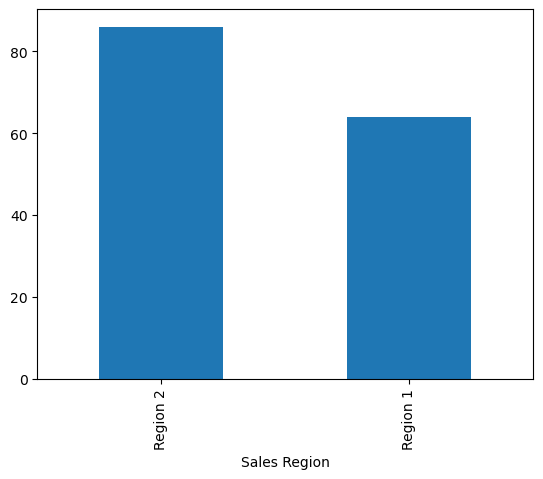

In [17]:
startup['Sales Region'].value_counts().plot(kind='bar')

In [18]:
startup['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

<Axes: xlabel='New Expansion'>

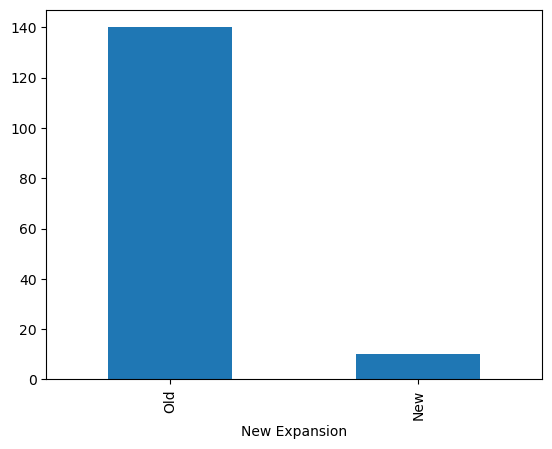

In [19]:
startup['New Expansion'].value_counts().plot(kind='bar')

It seems that there are more stores in Region 2, and 90% of the stores follow the lod expansion

- 150 rows, 7 feutures
- The data is about start ups expansion method each entry contains the store's id, state, city, region, the expansion method, cost, and revenue
- no duplication or nulls
- there are 35 states California has 40 start ups, and 149 cities there are two cities named rochester.
- There are only 2 regions the secons region has more start ups
- only 10 entries are following the new expansion
- The means of market spend 2893.15 and revenue	39301.43.

# Exploratory Data Analysis

In [20]:
startup.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
64,65,El Cajon,California,Region 2,Old,2950,19529
94,95,Gainesville,Florida,Region 1,Old,2990,48933
16,17,Tallahassee,Florida,Region 1,Old,2737,47729
53,54,Everett,Washington,Region 2,Old,3129,15562
100,101,Surprise,Arizona,Region 2,Old,2160,33647
104,105,Orange,California,Region 2,Old,2830,36821
141,142,Tempe,Arizona,Region 2,New,2911,48954
47,48,Murrieta,California,Region 2,Old,2344,16372
1,2,Midland,Texas,Region 2,Old,2727,45689
33,34,Charleston,South Carolina,Region 1,Old,2484,34829


In [21]:
startup['Revenue'].sum()

5895215

In [22]:
startup['Marketing Spend'].sum()

433972

In [23]:
startup[['Revenue','Marketing Spend']].corr()

,Revenue,Marketing Spend
Revenue,1.000000,0.094303
Marketing Spend,0.094303,1.000000


There is a strong positive correlation between Revenue and market (when the market spend increases the revenue increases)

To determine which are the profitability i need to extract a profit feuture

In [24]:
startup['Profit']=startup['Revenue']-startup['Marketing Spend']

## What are the top five stores in profit?

In [25]:
top_5_profits = startup[['Store ID','State', 'Profit']].sort_values(by='Profit', ascending=False).head(5)
top_5_profits

,Store ID,State,Profit
63,64,Arkansas,66388
31,32,Michigan,62667
37,38,California,61984
9,10,New York,61922
17,18,California,59942


- The Best store that achieves profits in store 64 in Arkansasa with profit 66388$
- Which Brings us to the question which state and city achieves best profit

## What are the top ten states in profit & Worst 10 states?

In [26]:
top_10_states = startup.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
top_10_states

State
California     1390222
Texas           589623
Florida         443549
Washington      278045
Alabama         208455
Illinois        186549
New York        151609
Georgia         147316
Connecticut     146142
Tennessee       142956
Name: Profit, dtype: int64

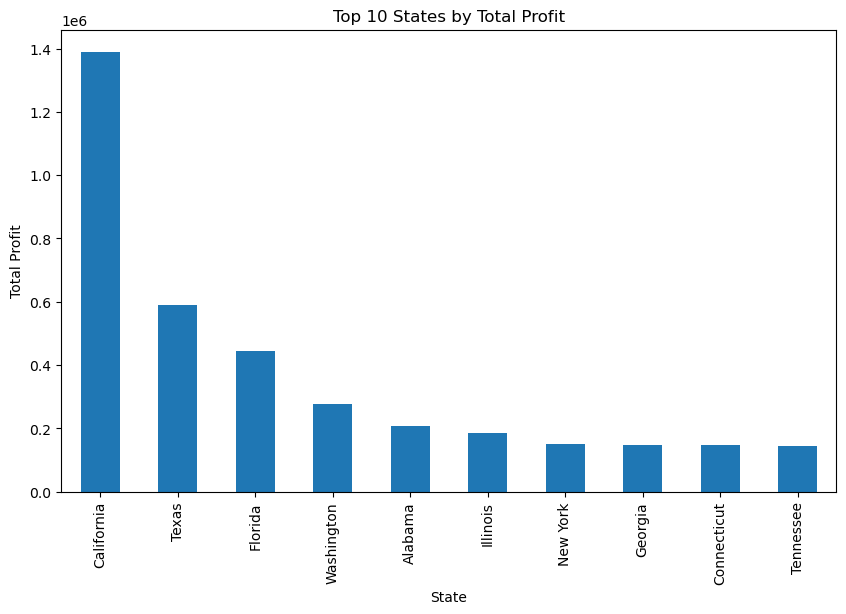

In [27]:
top_10_states.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=90)
plt.title('Top 10 States by Total Profit')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.show()

- Recall that that the states that had the most stores were California 40,Texas 17,Florida 12,Washington 7,Illinois 5,and Alabama 4
- It seems that the stores in alabama are more popular than illinos sine the number of stores in alabama are less.


In [28]:
worst_10_states = startup.groupby('State')['Profit'].sum().sort_values(ascending=False).tail(10)
worst_10_states

State
Mississippi      51235
South Dakota     47636
Oregon           32748
Indiana          18948
Montana          17526
New Mexico       16993
Oklahoma         16355
Minnesota        15245
Wisconsin        14868
New Hampshire    14632
Name: Profit, dtype: int64

## Since the best state is California what are the best 10 cities in California?

In [29]:
startup[startup['State']=='California'].groupby('City')['Profit'].sum().nlargest(10)

City
Oxnard              61984
Fontana             59942
San Bernardino      56471
Santa Rosa          55993
Moreno Valley       55747
Garden Grove        54245
Modesto             53759
Oceanside           52600
Huntington Beach    51618
Rancho Cucamonga    49421
Name: Profit, dtype: int64

## What are the top ten Cities in profit?

In [30]:
top_10_cities = startup.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)
top_10_cities

City
Rochester        77167
Little Rock      66388
Grand Rapids     62667
Oxnard           61984
Fontana          59942
Brownsville      59473
Providence       59146
Birmingham       57228
Worcester        57165
Overland Park    57018
Name: Profit, dtype: int64

It seems Rochestor had the best profit

## What is the best region in profit?

In [31]:
top_Region=round(startup.groupby('Sales Region')['Profit'].describe(),2)
top_Region

,count,mean,std,min,25%,50%,75%,max
Sales Region,,,,,,,,
Region 1,64.0,37678.20,15038.53,14632.0,19629.50,42314.5,48961.25,62667.0
Region 2,86.0,35463.23,15744.87,12433.0,17837.25,38348.0,47234.00,66388.0


In [32]:
startup.groupby('Sales Region')['Profit'].sum()

Sales Region
Region 1    2411405
Region 2    3049838
Name: Profit, dtype: int64

- Region 2 has more sales happening, which leads to a higher overall profit even though each sale brings in a slightly lower amount on average.
- But since there are more stores in Region 2 it seems that Region 1 is preforming better on avarage

## What is the best Expansion method in profit?

In [33]:
top_exp=round(startup.groupby('New Expansion')['Profit'].describe(),2)
top_exp

,count,mean,std,min,25%,50%,75%,max
New Expansion,,,,,,,,
New,10.0,42901.00,11152.60,19463.0,38464.75,45539.5,48819.00,59473.0
Old,140.0,35944.52,15623.36,12433.0,17975.75,39153.5,48071.75,66388.0


In [34]:
startup.groupby('New Expansion')['Profit'].sum()

New Expansion
New     429010
Old    5032233
Name: Profit, dtype: int64

- On avarege Best profit comes from New Expansion even though there are only 10% of the entries that are new.
- Even though old expansion has more total profit its because the old is 90% of the data

## Which store spends the least and which spends alot?

In [35]:
startup.nsmallest(1, columns='Marketing Spend')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
135,136,San Mateo,California,Region 2,Old,1811,19426,17615


In [36]:
startup.nlargest(1, columns='Marketing Spend')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
86,87,Amarillo,Texas,Region 2,Old,3984,56089,52105


## Which stores gets the biggest revenue and which gets the worst?

In [37]:
startup.nlargest(1, columns='Revenue')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388


In [38]:
startup.nsmallest(1, columns='Revenue')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
53,54,Everett,Washington,Region 2,Old,3129,15562,12433


In [39]:
startup['ROMS']=round(startup['Profit']/startup['Marketing Spend'],2)*100

In [40]:
#ROI
startup['ROMS%']=round(startup['Profit']/startup['Marketing Spend'],2)

In [41]:
startup.nlargest(5, columns='ROMS%')

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388,2721.0,27.21
37,38,Oxnard,California,Region 2,Old,2318,64302,61984,2674.0,26.74
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475,62667,2232.0,22.32
25,26,Port St. Lucie,Florida,Region 1,Old,2420,55790,53370,2205.0,22.05
8,9,Worcester,Massachusetts,Region 1,Old,2675,59840,57165,2137.0,21.37


In [42]:
startup['Profit Margin%']=round(startup['Profit']/startup['Revenue'],2)*100

In [43]:
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%,Profit Margin%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1769.0,17.69,95.0
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.0,15.75,94.0
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.0,16.90,94.0
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1288.0,12.88,93.0
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.0,19.87,95.0
...,...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.0,14.37,93.0
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.0,16.18,94.0
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.0,15.38,94.0
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.0,6.50,87.0


In [44]:
startup.to_csv('startup-expansion-modified.csv')